# Dataset

This notebook contains code for summarizing the dataset of use cases.

## Imports

In [1]:
import pandas as pd

from paths import input_folder, output_folder

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [2]:
use_cases_df = pd.read_csv(f"{input_folder}use-cases.csv", index_col=0)
use_cases_df.head(5)

,ProjectID,UC,TransTypes,UCType,Cfp,TitleTokens
0,P01,UC2-1-1,C|D|R|U,C|D|R|U,16,manage faculties crud
1,P01,UC2-1-10,DL|L|R,L,27,assign science olympiads major specialty edit ...
2,P01,UC2-1-11,CS|R,CS,7,manage ranking algorithms
3,P01,UC2-1-13,C|D|R|U,C|D|R|U,17,manage exams crud
4,P01,UC2-1-14,DL|L|R,L,27,manage assignments exams majors specialties


## Number of use cases per project

The number of user-level use cases taken into account (after rejecting one of the use cases in the project P26)

In [3]:
use_cases_df.groupby("ProjectID").count().loc[:, ['UC']]

,UC
ProjectID,
P01,42
P02,17
P03,36
P04,23
P05,19
P06,26
P07,13
P08,8
P09,13


## Distributions of use-case size

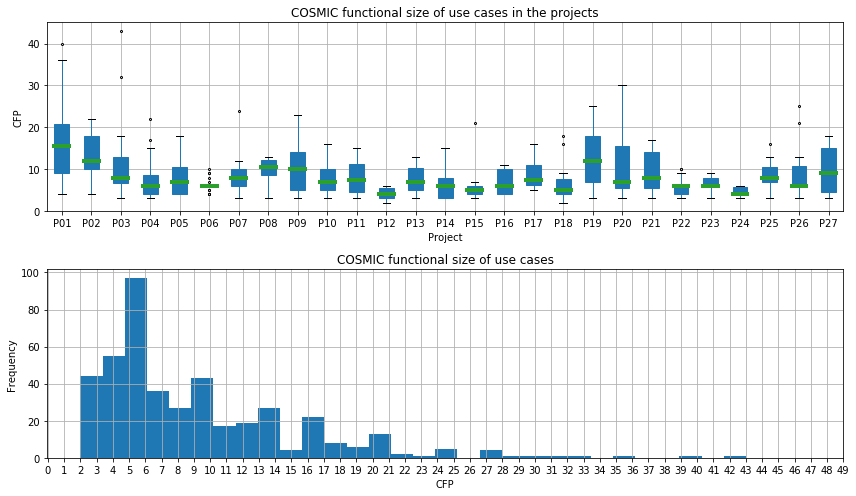

In [8]:
fig = plt.figure(figsize=(12,7))

boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='black')
flierprops = dict(marker='o', markerfacecolor='white', markersize=2,
                  linestyle='none')

ax = plt.subplot(211)
bp = use_cases_df.boxplot(ax=ax, column=['Cfp'], by=['ProjectID'], showfliers=True,
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)

plt.suptitle('')
ax.set_title(r'COSMIC functional size of use cases in the projects')
ax.set_xlabel('Project')
ax.set_ylabel('CFP')


ax = plt.subplot(212)

hist = use_cases_df.hist(ax=ax, column=['Cfp'], bins=30)

plt.suptitle('')
ax.set_title(r'COSMIC functional size of use cases')
ax.set_xlabel('CFP')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(0, 50, 1))


plt.tight_layout()
plt.savefig(f"{output_folder}use-case-size.pdf")
plt.show()
plt.close()

In [9]:
use_cases_df['Cfp'].mean()

9.265446224256292

In [11]:
use_cases_df['Cfp'].std()

6.281837850850034

In [12]:
use_cases_df[use_cases_df['Cfp'] > 30]

,ProjectID,UC,TransTypes,UCType,Cfp,TitleTokens
15,P01,UC2-2-11,C|D|DL|L,C|D|R|U,36,modify candidate 's payments
21,P01,UC2-3-7,DL|L|L,L,33,assign candidates exam rooms
31,P01,UC2-5-4,CS|CS|CS|R|R,CS,40,accept candidates
239,P03,PU-SCMS-ZK-10,L|L|R,L,43,add card profile edit card profile
245,P03,PU-SCMS-ZK-19,L|L|R,L,32,define new theme card edit theme card


In [16]:
np.percentile(use_cases_df['Cfp'], 50)

7.0

In [18]:
use_cases_df.groupby('ProjectID').mean()['Cfp'].mean()

8.55963647566176

In [19]:
use_cases_df.groupby('ProjectID').mean()['Cfp'].std()

2.723069530151267